# E2a: Küchentischversuch zum Laval-Rotor

Name: Paul Bobrinskoy
Datum:  11.01.2024

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

-Wie manifestieren sich minimale Bewegungen in den Beschleunigungsdaten von Gegenständen wie Handys mit Vibrationsalarm oder Lautsprechern?

-Welche Auswirkungen hat die Positionierung des Beschleunigungssensors auf die gemessenen Beschleunigungsdaten?

# Erster Versuch
Hier werden Sie den ersten Gegenstand auswerten. Die Auswertung des zweiten Gegenstands kann das analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands: (Hier: Galaxy Watch 3 (Uhr))

<img src="Pictures/Lavalrotor_experiment_Watch3.jpg" width="500">


----------------------------------------------------------------------------------------------
- Beschreibung des Aufbaus: 
Wie auf dem Bild zu sehen ist, ist der erste Versuch wie folgt aufgebaut: Wir möchten das Experiment im Vibrationsmodus einer Smartwatch durchführen. Daher habe ich den Schwingungssensor mithilfe von Tesa auf der Smartwatch befestigt und anschließend die Smartwatch in den Vibrationsmodus versetzt. 

- Vorgangsbeschreibung:
Nachdem alles gut gehalten hat, habe ich zuerst die Smartwatch im Vibrationsmodus angeschaltet und geguckt ob es stark genug gehalten hat (damit ich keine oder sehr geringe Fehler während der Messung bekomme). Dann habe ich das Programm durchgeführt (das in der Regel 20 Sekunden dauert) und die Daten bekommen und gespeichert.

## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [44]:
import h5py
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft

path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [6]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = 'measurement_data/data_20240111_175257_Paul_Bobrinskoy_watch' 
# replace None by the relative path to the first object's folder
h5_file_name = 'data_20240111_175257_Paul_Bobrinskoy_watch.h5' 
# replace None by the filename of the hdf5-file
# file_path = os.path.join(path_measurement_folder, h5_file_name)
# ---------------------------------------------------------------------------------------------#1-end

In [7]:
"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))

{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20240111_175257_Paul_Bobrinskoy_watch/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240111_175257_Paul_Bobrinskoy_watch/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20240111_175257_Paul_Bobrinskoy_watch/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "ab8e604e-ad5b-11ee-b5da-7b0985e59df7": {
    "type": "probe",
    "name": "watch",
    "comment": "",
    "path": "measurement_da

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [23]:
data_path = path_measurement_folder + '/' + h5_file_name
with h5py.File(data_path) as f:
        
        acc_x = f["1ee847be-fddd-6ee4-892a-68c4555b0981/acceleration_x"]
        acc_y = f["1ee847be-fddd-6ee4-892a-68c4555b0981/acceleration_y"]
        acc_z = f["1ee847be-fddd-6ee4-892a-68c4555b0981/acceleration_z"]
        time = f["1ee847be-fddd-6ee4-892a-68c4555b0981/timestamp"]
        
        acc_x_array = np.array(acc_x)
        acc_y_array = np.array(acc_y)
        acc_z_array = np.array(acc_z)
        time_array = np.array(time)

print("Beschleunigung x:")       
print(acc_x_array)
print()
print("Beschleunigung y:")
print(acc_y_array)
print()
print("Beschleunigung z:")
print(acc_z_array)
print()
print("Zeit:")
print(time_array)

Beschleunigung x:
[-2.5105024 -2.5105024 -2.5105024 ... -0.6668522 -0.6668522 -0.6668522]

Beschleunigung y:
[-3.2165812 -3.2165812 -3.2165812 ... -0.9414384 -0.9414384 -0.9022118]

Beschleunigung z:
[10.3165958 10.3165958 10.3165958 ... 11.0619012 11.0619012 11.0226746]

Zeit:
[1.02806091e-03 3.41010094e-03 5.56015968e-03 ... 1.99963796e+01
 1.99985652e+01 2.00006225e+01]


#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [28]:
vec_acc_magnitude = get_vec_accel(acc_x_array, acc_y_array, acc_z_array)

print("Betrag des Beschleunigungsvektors für jeden Zeitpunkt:")
print(vec_acc_magnitude)

Betrag des Beschleunigungsvektors für jeden Zeitpunkt:
[11.09419514 11.09419514 11.09419514 ... 11.12189985 11.12189985
 11.07962244]


#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

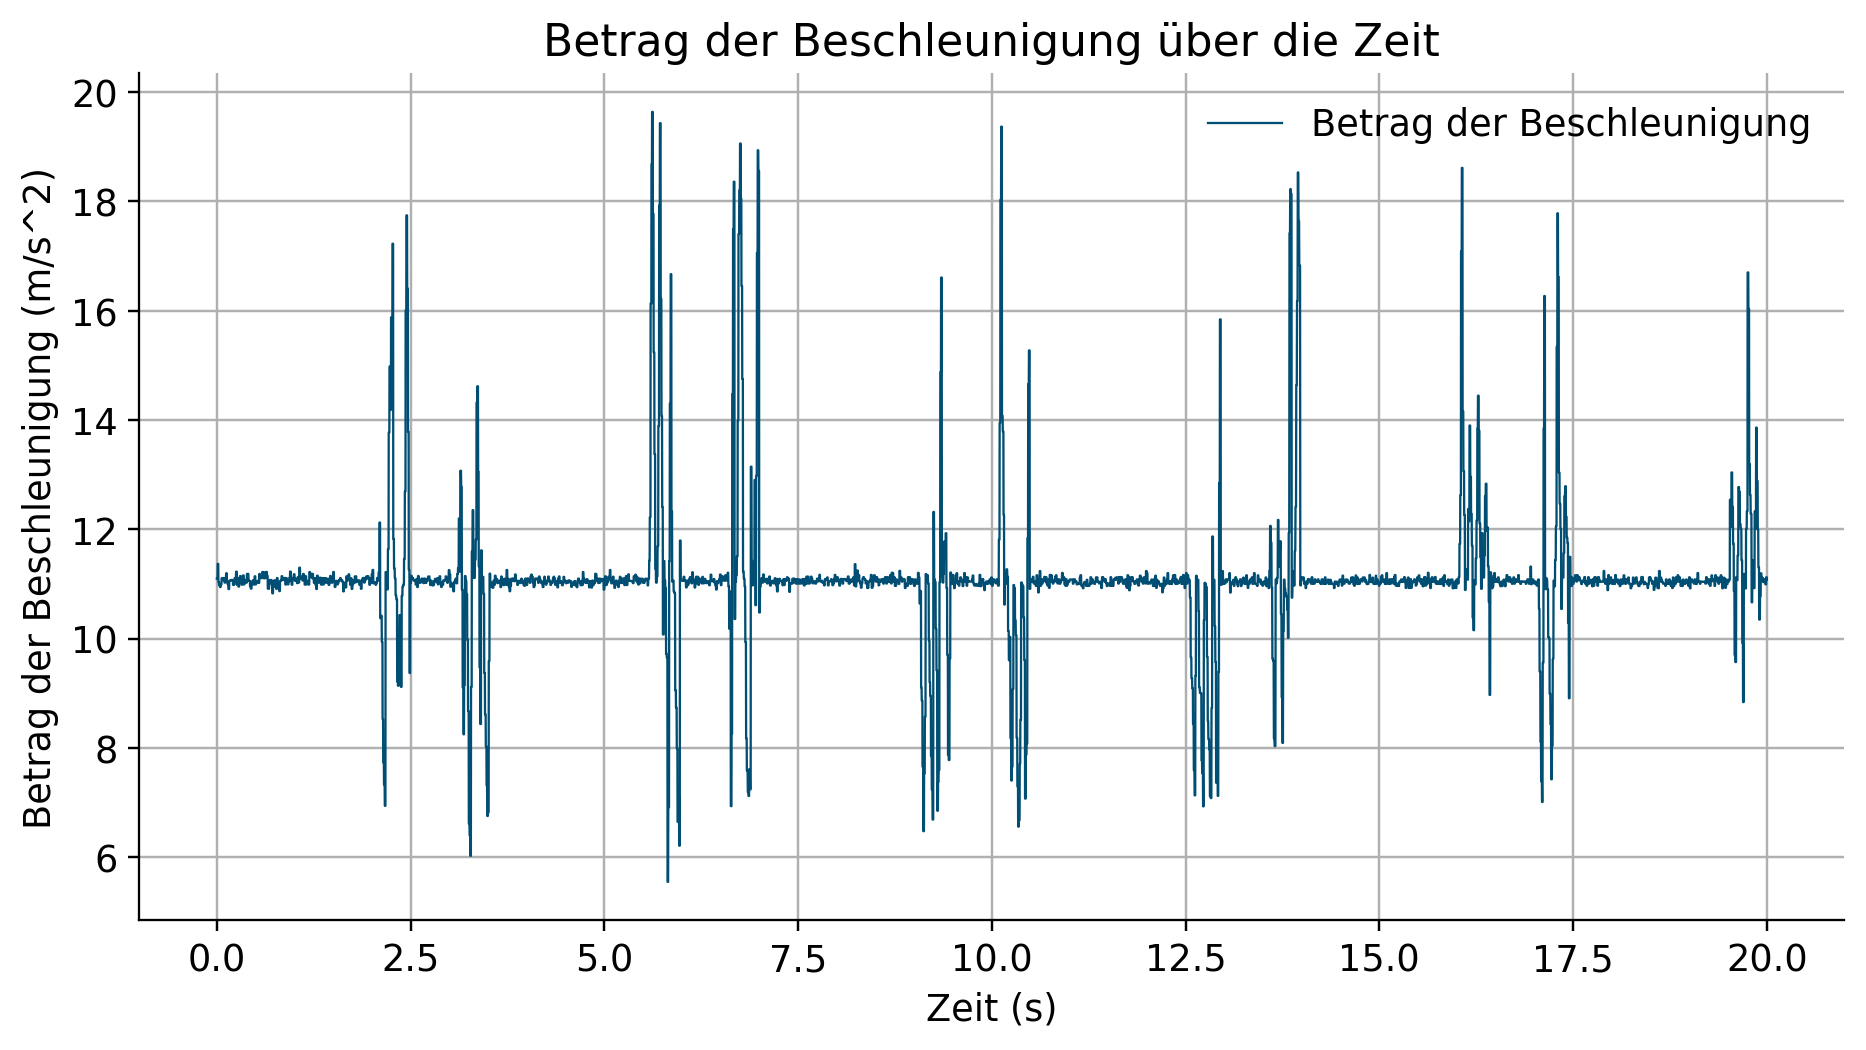

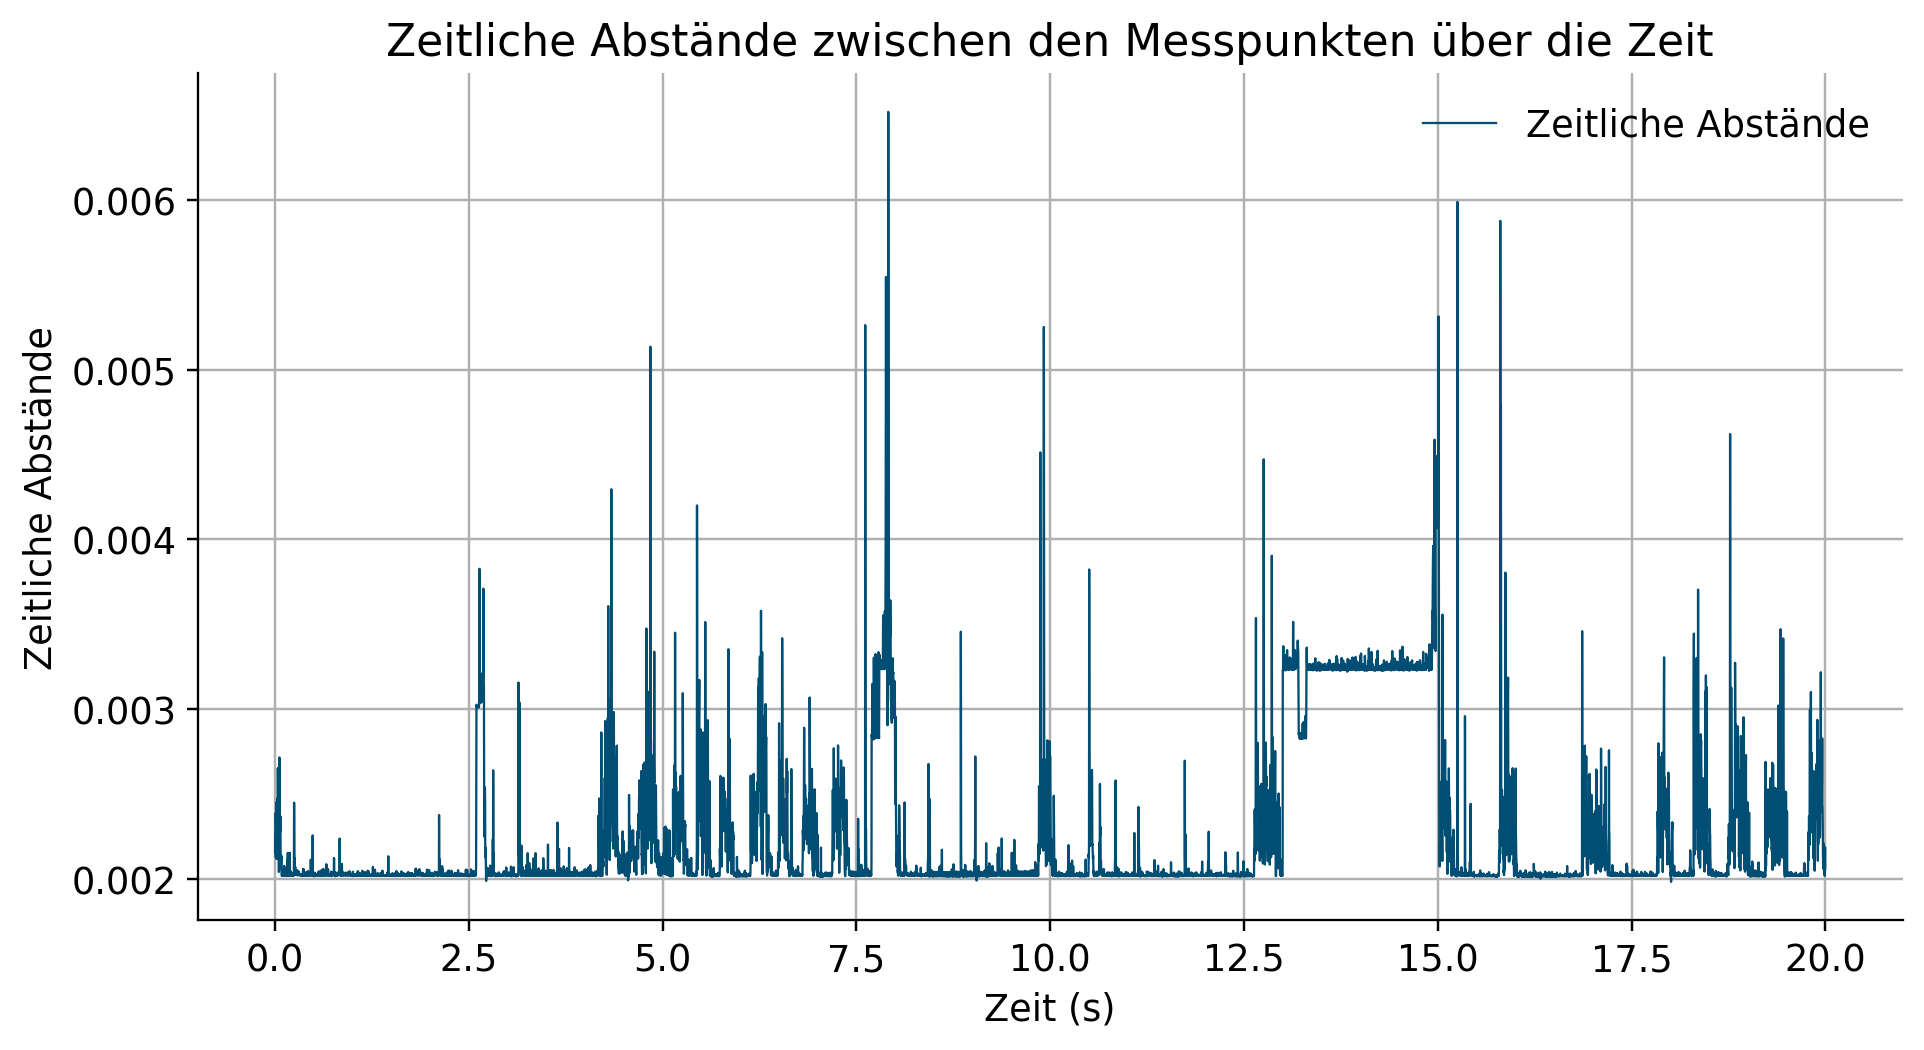

In [34]:
# Plot für den Betrag der Beschleunigung über die Zeit
plt.figure(figsize=(10, 5))
plt.plot(time_array, vec_acc_magnitude, label='Betrag der Beschleunigung')
plt.xlabel('Zeit (s)')
plt.ylabel('Betrag der Beschleunigung (m/s^2)')
plt.title('Betrag der Beschleunigung über die Zeit')
plt.legend()
plt.grid(True)
plt.show()

# Berechnung der zeitlichen Abstände zwischen den Messpunkten
time_diff = np.diff(time_array)

# Plot für die zeitlichen Abstände über die Zeit
plt.figure(figsize=(10, 5))
plt.plot(time_array[:-1], time_diff, label='Zeitliche Abstände')
plt.xlabel('Zeit (s)')
plt.ylabel('Zeitliche Abstände')
plt.title('Zeitliche Abstände zwischen den Messpunkten über die Zeit')
plt.legend()
plt.grid(True)
plt.show()

#### 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

Interpolation für Beschleunigung x:
[1.02806091e-03 3.22485292e-03 5.42164493e-03 ... 1.99962289e+01
 1.99984257e+01 2.00006225e+01] [-2.5105024 -2.5105024 -2.5105024 ... -0.6668522 -0.6668522 -0.6668522]

Interpolation für Beschleunigung y:
[1.02806091e-03 3.22485292e-03 5.42164493e-03 ... 1.99962289e+01
 1.99984257e+01 2.00006225e+01] [-3.2165812 -3.2165812 -3.2165812 ... -0.9414384 -0.9414384 -0.9022118]

Interpolation für Beschleunigung z:
[1.02806091e-03 3.22485292e-03 5.42164493e-03 ... 1.99962289e+01
 1.99984257e+01 2.00006225e+01] [10.3165958 10.3165958 10.3165958 ... 11.0619012 11.0619012 11.0226746]



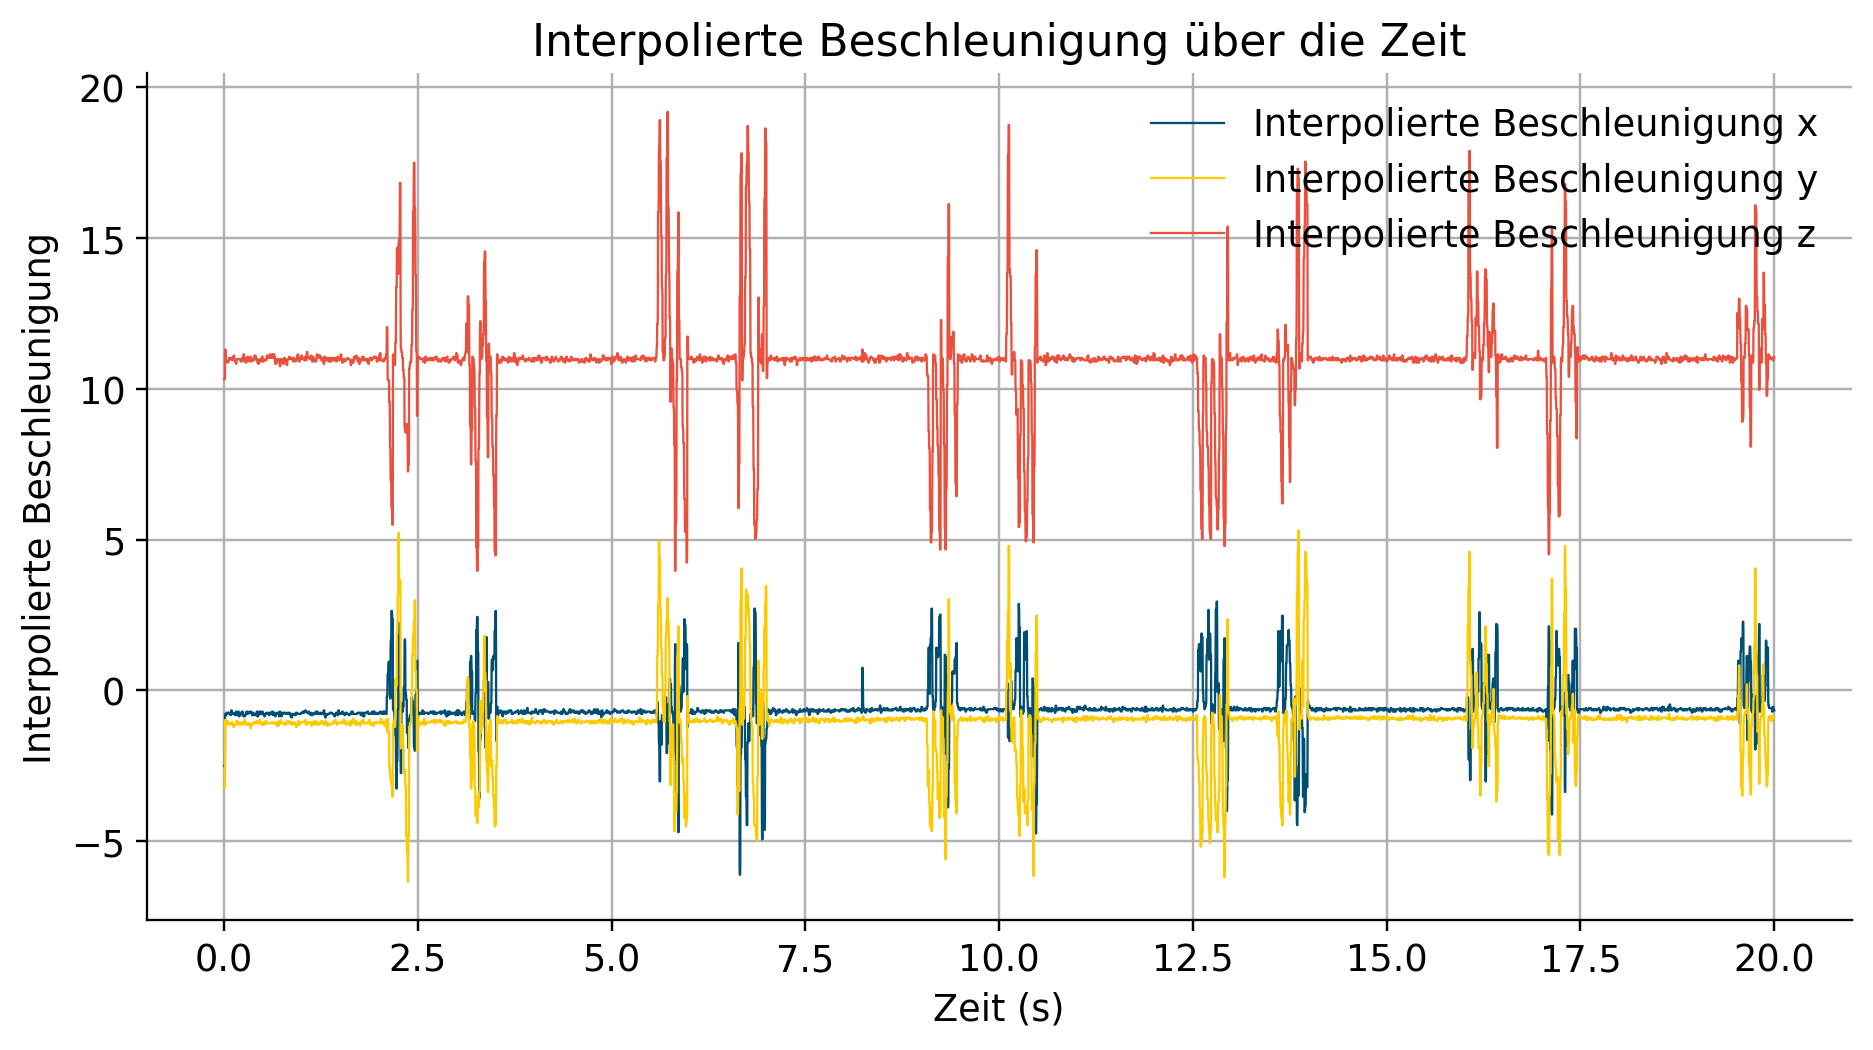

In [42]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the acceleration.

# Verwendung der Interpolationsfunktion für Beschleunigung x, y und z
inter_time_x, inter_acc_x = interpolation(time_array, acc_x_array)
inter_time_y, inter_acc_y = interpolation(time_array, acc_y_array)
inter_time_z, inter_acc_z = interpolation(time_array, acc_z_array)

print("Interpolation für Beschleunigung x:")
print(inter_time_x, inter_acc_x)
print()
print("Interpolation für Beschleunigung y:")
print(inter_time_y, inter_acc_y)
print()
print("Interpolation für Beschleunigung z:")
print(inter_time_z, inter_acc_z)
print()


# Plot für die interpolierten Beschleunigungen
plt.figure(figsize=(10, 5))
plt.plot(inter_time_x, inter_acc_x, label='Interpolierte Beschleunigung x')
plt.plot(inter_time_y, inter_acc_y, label='Interpolierte Beschleunigung y')
plt.plot(inter_time_z, inter_acc_z, label='Interpolierte Beschleunigung z')
plt.xlabel('Zeit (s)')
plt.ylabel('Interpolierte Beschleunigung')
plt.title('Interpolierte Beschleunigung über die Zeit')
plt.legend()
plt.grid(True)
plt.show()


#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

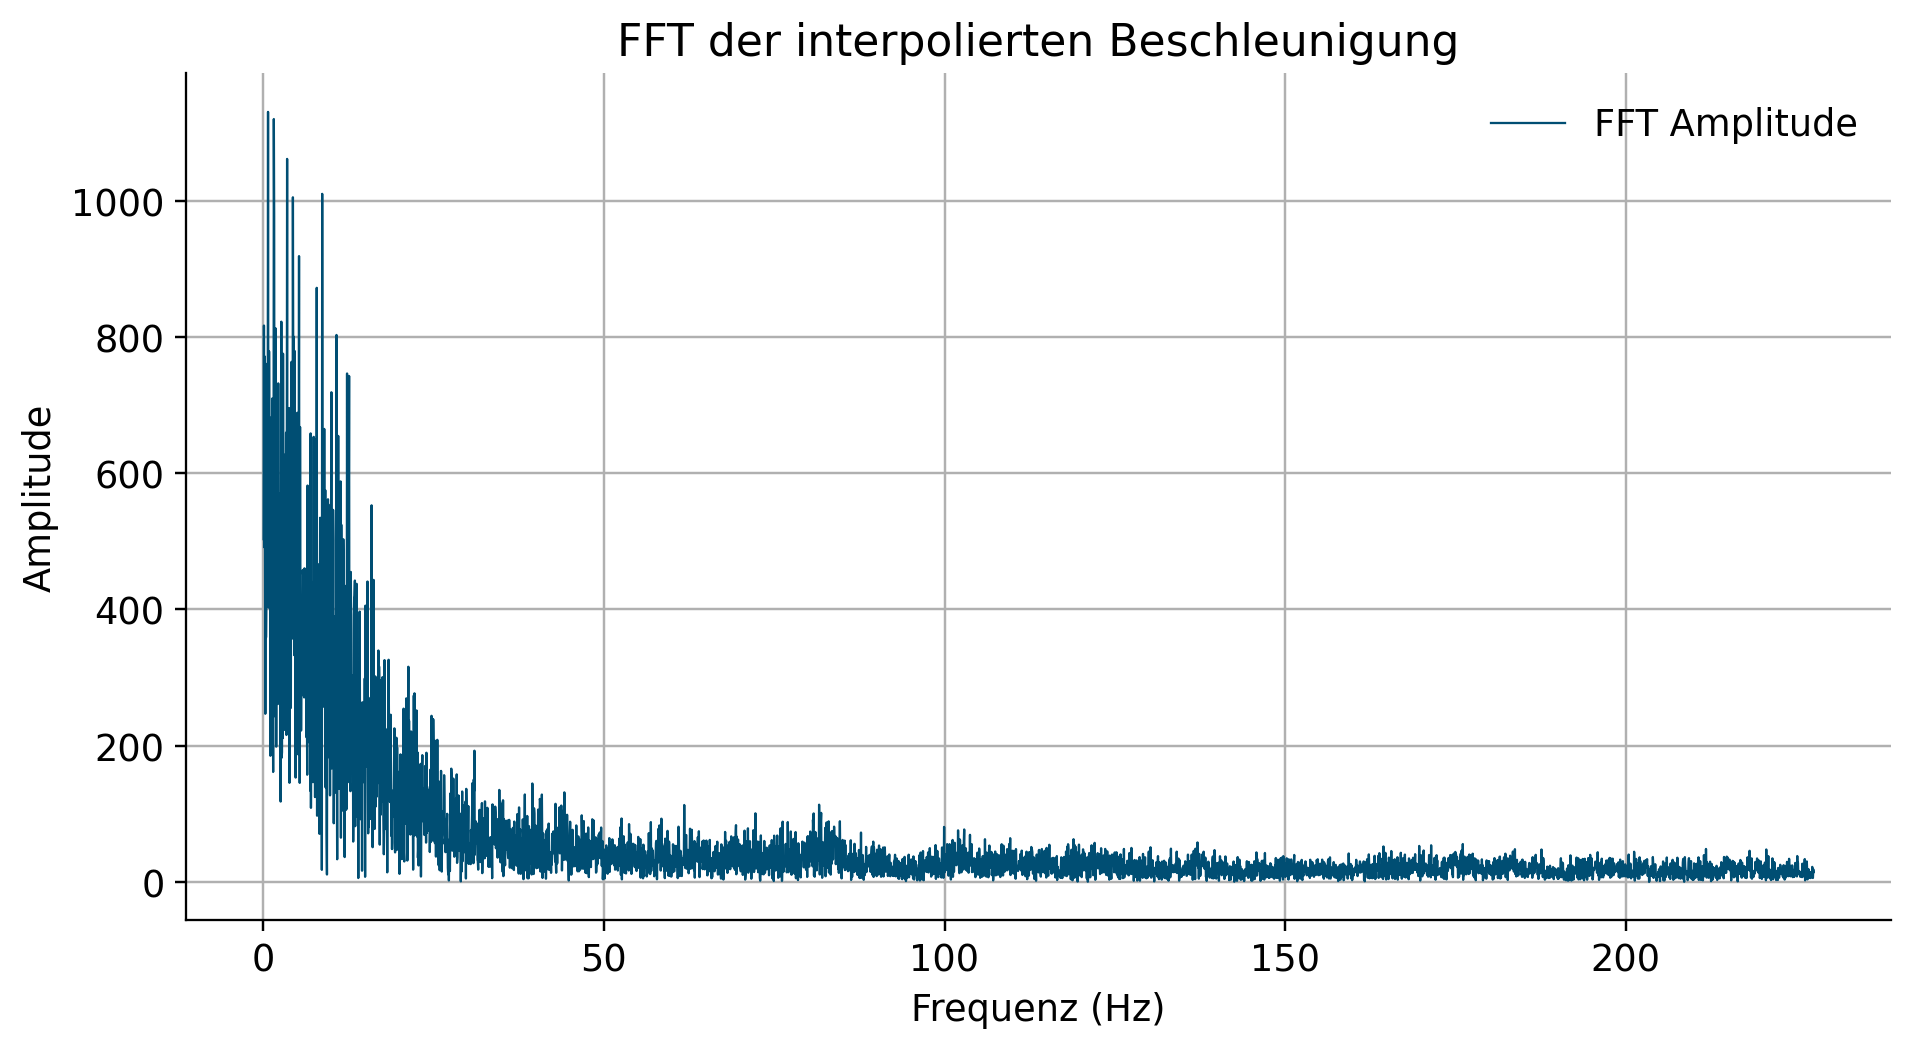

In [40]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.

# Verwendung der FFT-Funktion für den interpolierten Betrag der Beschleunigung
fft_amplitude, fft_frequency = my_fft(vec_acc_magnitude, inter_time_x)

# Plot für die Amplitude des Signals als Funktion der Frequenz
plt.figure(figsize=(10, 5))
plt.plot(fft_frequency, fft_amplitude, label='FFT Amplitude')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT der interpolierten Beschleunigung')
plt.legend()
plt.grid(True)
plt.show()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Zweiter Versuch
Hier werten Sie den zweiten Gegenstand aus.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands: (Hier die Musikbox JBL Flip3)

<img src="Pictures/Lavalrotor_experiment_Flip3.jpg" width="500">

-----------------------------------------------------------------------------------------------------------------------------
- Beschreibung des Aufbaus:
Wie auf dem Bild zu sehen ist, ist der zweite Versuch wie folgt aufgebaut: Wir möchten das Experiment, während es eine Musik (oder ein Geräusch) läuft, durchführen. Also während die Musikbox an ist. Daher habe ich den Schwingungssensor mithilfe von Tesa auf der Musikbox befestigt und anschließend eine Musik auf der Musikbox laufen lassen.

- Vorgangsbeschreibung:
Nachdem alles gut gehalten hat, habe ich zuerst eine Musik auf der Musikbox angeschaltet und geguckt ob es stark genug gehalten hat (damit ich keine oder sehr geringe Fehler während der Messung bekomme). Dann habe ich das Programm durchgeführt (das in der Regel 20 Sekunden dauert) und die Daten bekommen und gespeichert.

## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [46]:
"""Parameter definition"""

path_measurement_folder = 'measurement_data/data_20240111_175713_Paul_Bobrinskoy_music_speaker' 
# replace None by the relative path to the first object's folder
h5_file_name = 'data_20240111_175713_Paul_Bobrinskoy_music_speaker.h5' 
# replace None by the filename of the hdf5-file

"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))

{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20240111_175713_Paul_Bobrinskoy_music_speaker/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240111_175713_Paul_Bobrinskoy_music_speaker/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20240111_175713_Paul_Bobrinskoy_music_speaker/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "aa98a7ee-ad5b-11ee-87e2-e7e65d167f52": {
    "type": "probe",
    "name": "music_speaker",
    "comment":

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [47]:
data_path = path_measurement_folder + '/' + h5_file_name
with h5py.File(data_path) as f:
        
        acc_x = f["1ee847be-fddd-6ee4-892a-68c4555b0981/acceleration_x"]
        acc_y = f["1ee847be-fddd-6ee4-892a-68c4555b0981/acceleration_y"]
        acc_z = f["1ee847be-fddd-6ee4-892a-68c4555b0981/acceleration_z"]
        time = f["1ee847be-fddd-6ee4-892a-68c4555b0981/timestamp"]
        
        acc_x_array = np.array(acc_x)
        acc_y_array = np.array(acc_y)
        acc_z_array = np.array(acc_z)
        time_array = np.array(time)

print("Beschleunigung x:")       
print(acc_x_array)
print()
print("Beschleunigung y:")
print(acc_y_array)
print()
print("Beschleunigung z:")
print(acc_z_array)
print()
print("Zeit:")
print(time_array)

Beschleunigung x:
[0.1569064 0.1569064 0.1569064 ... 0.3530394 0.3530394 0.3530394]

Beschleunigung y:
[-3.3734876 -3.3734876 -3.3734876 ... -1.7259704 -1.7259704 -1.7259704]

Beschleunigung z:
[10.4735022 10.4735022 10.4735022 ... 10.8657682 10.8657682 10.8657682]

Zeit:
[1.02949142e-03 3.07345390e-03 5.09357452e-03 ... 1.99952807e+01
 1.99973063e+01 1.99993243e+01]


#### 2. Betrag der Beschleunigung berechnen


In [48]:
vec_acc_magnitude = get_vec_accel(acc_x_array, acc_y_array, acc_z_array)

print("Betrag des Beschleunigungsvektors für jeden Zeitpunkt:")
print(vec_acc_magnitude)

Betrag des Beschleunigungsvektors für jeden Zeitpunkt:
[11.0045121  11.0045121  11.0045121  ... 11.00765775 11.00765775
 11.00765775]


#### 3. Darstellung der Messdaten

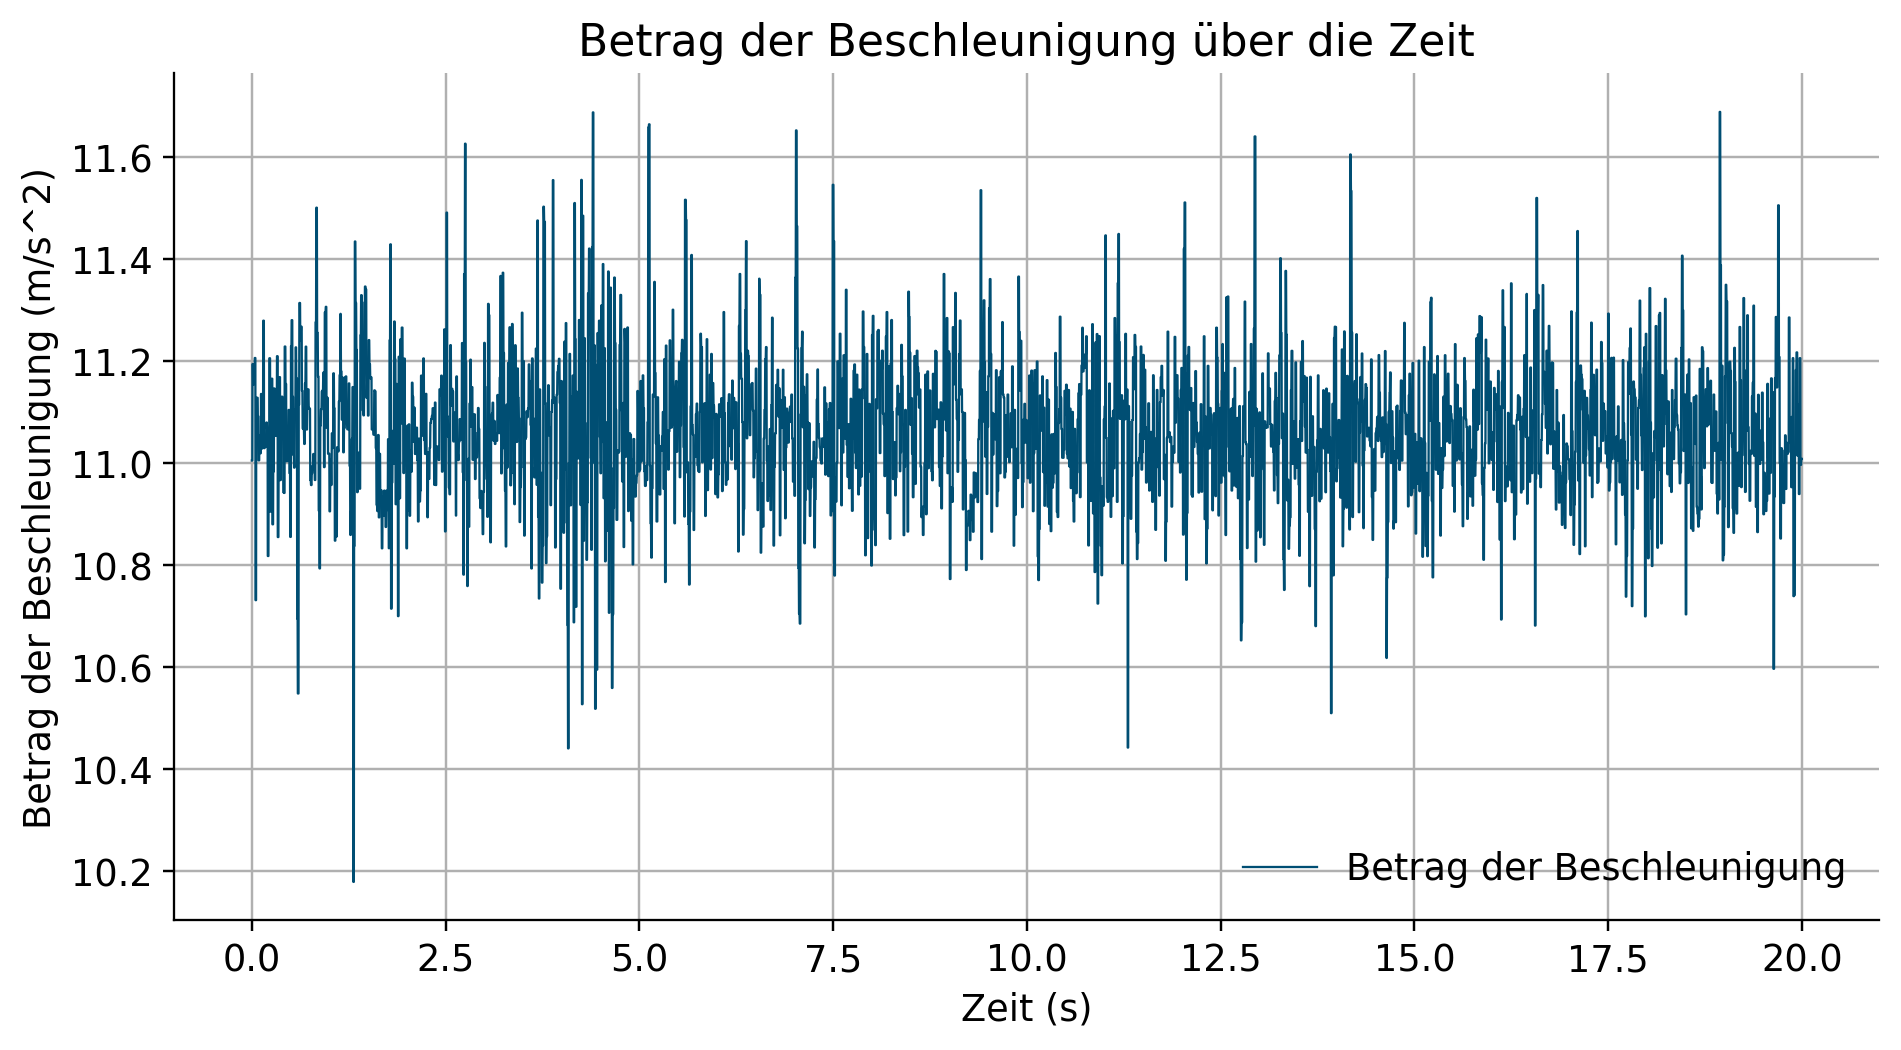

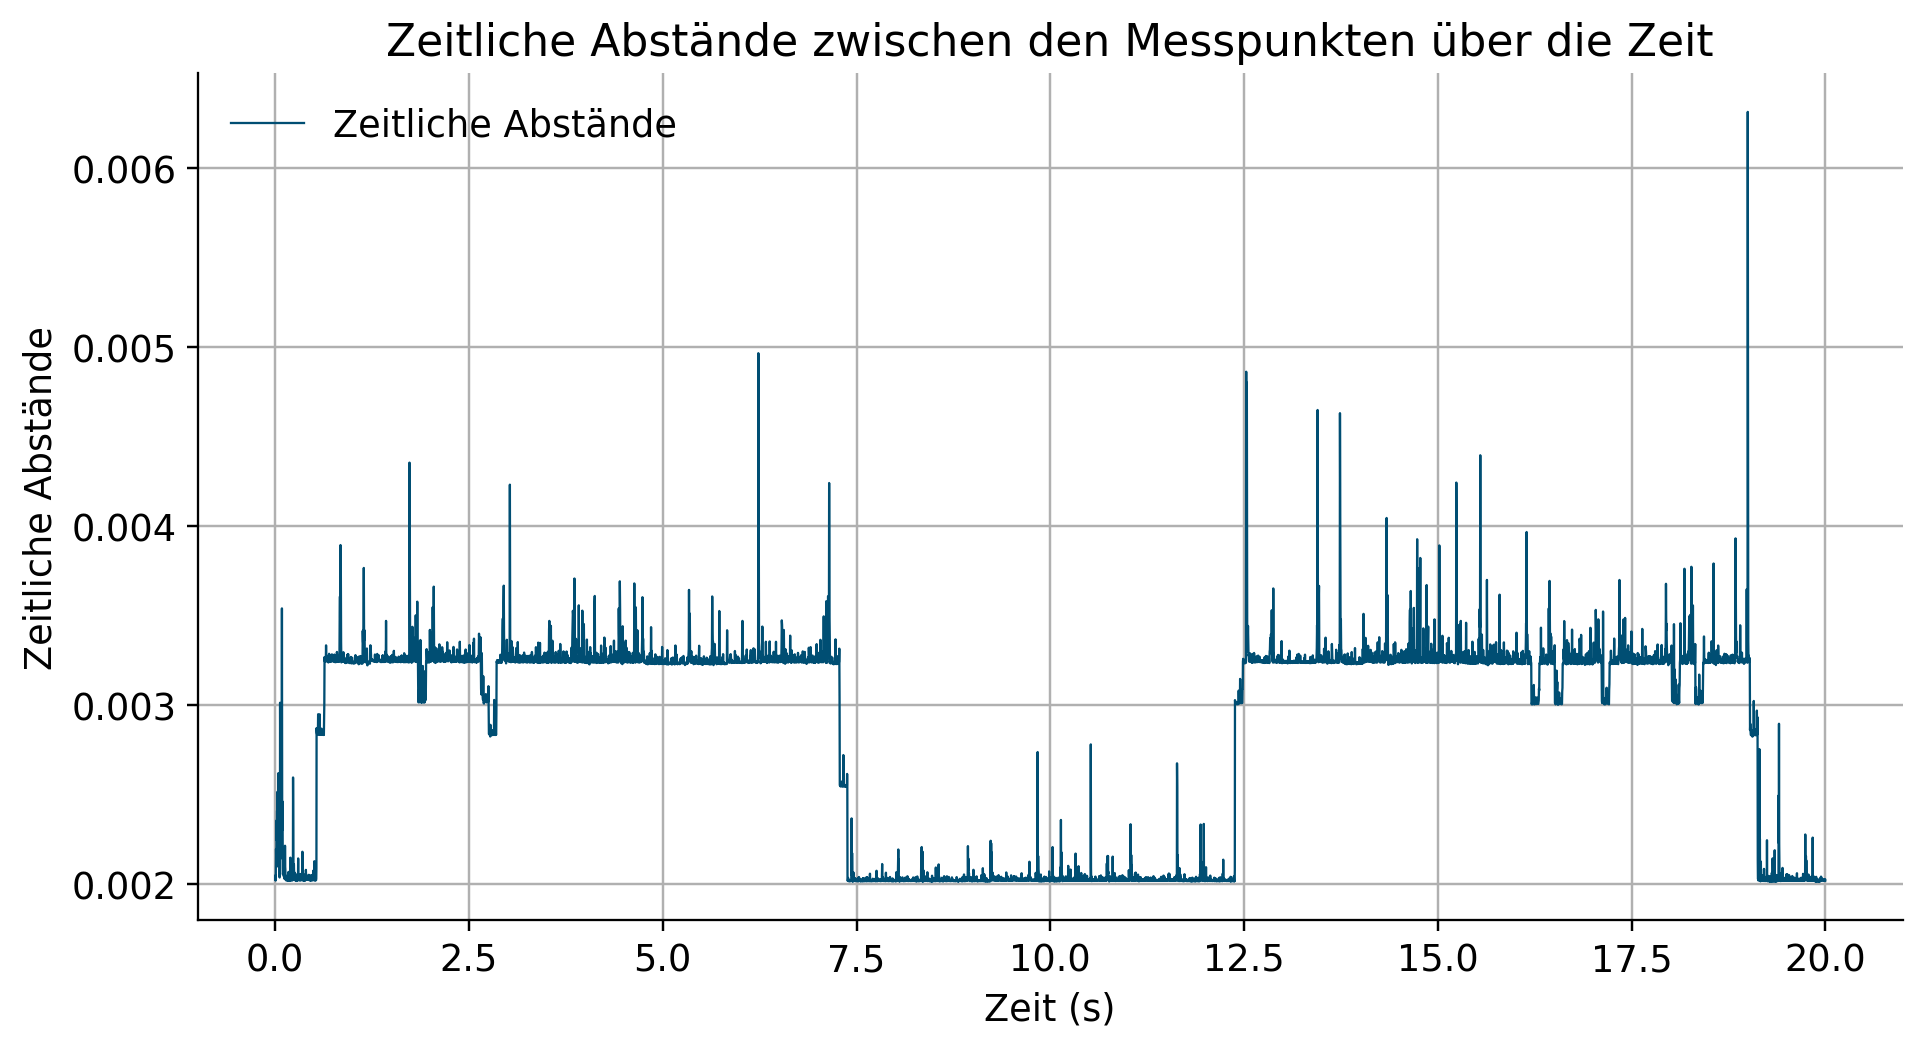

In [49]:
# Plot für den Betrag der Beschleunigung über die Zeit
plt.figure(figsize=(10, 5))
plt.plot(time_array, vec_acc_magnitude, label='Betrag der Beschleunigung')
plt.xlabel('Zeit (s)')
plt.ylabel('Betrag der Beschleunigung (m/s^2)')
plt.title('Betrag der Beschleunigung über die Zeit')
plt.legend()
plt.grid(True)
plt.show()

# Berechnung der zeitlichen Abstände zwischen den Messpunkten
time_diff = np.diff(time_array)

# Plot für die zeitlichen Abstände über die Zeit
plt.figure(figsize=(10, 5))
plt.plot(time_array[:-1], time_diff, label='Zeitliche Abstände')
plt.xlabel('Zeit (s)')
plt.ylabel('Zeitliche Abstände')
plt.title('Zeitliche Abstände zwischen den Messpunkten über die Zeit')
plt.legend()
plt.grid(True)
plt.show()

#### 4. Interpolation der Messwerte



Interpolation für Beschleunigung x:
[1.02949142e-03 3.74960770e-03 6.46972397e-03 ... 1.99938841e+01
 1.99966042e+01 1.99993243e+01] [0.1569064 0.1569064 0.1569064 ... 0.3530394 0.3530394 0.3530394]

Interpolation für Beschleunigung y:
[1.02949142e-03 3.74960770e-03 6.46972397e-03 ... 1.99938841e+01
 1.99966042e+01 1.99993243e+01] [-3.3734876 -3.3734876 -3.3734876 ... -1.7259704 -1.7259704 -1.7259704]

Interpolation für Beschleunigung z:
[1.02949142e-03 3.74960770e-03 6.46972397e-03 ... 1.99938841e+01
 1.99966042e+01 1.99993243e+01] [10.4735022 10.4735022 10.4735022 ... 10.8657682 10.8657682 10.8657682]



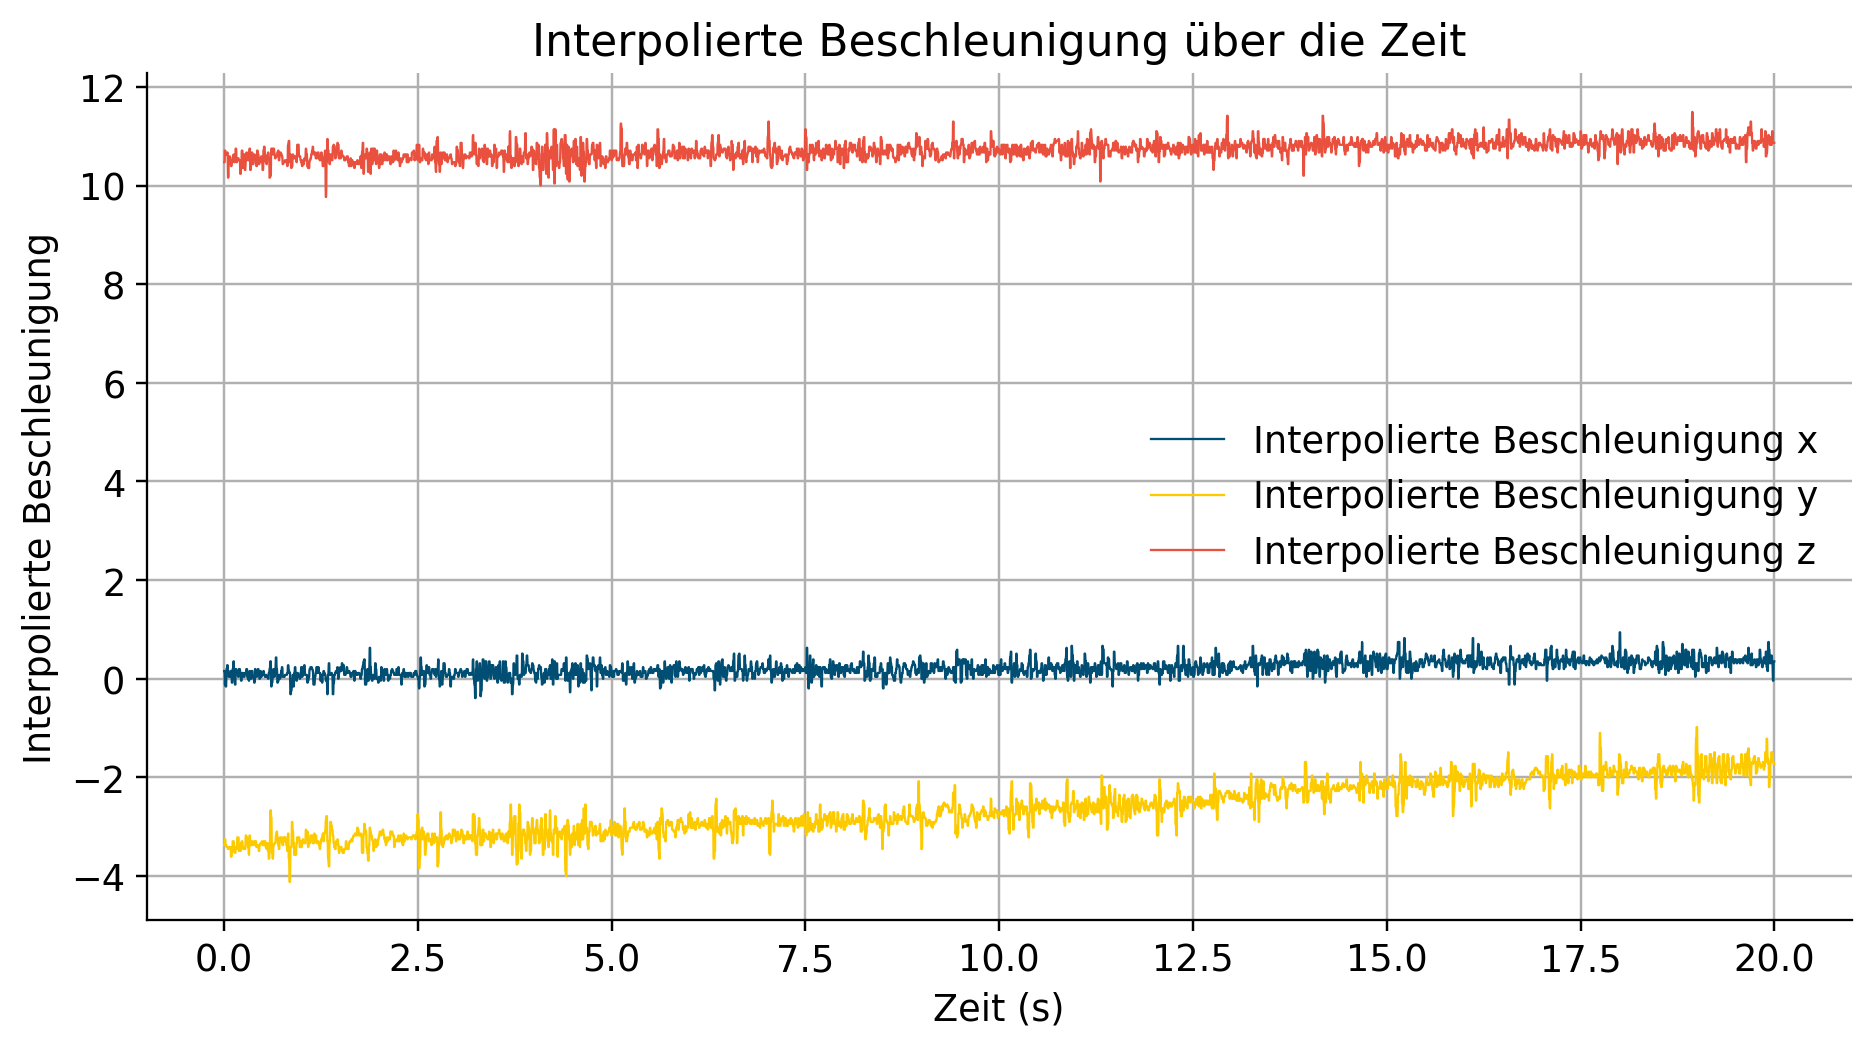

In [50]:
# Verwendung der Interpolationsfunktion für Beschleunigung x, y und z
inter_time_x, inter_acc_x = interpolation(time_array, acc_x_array)
inter_time_y, inter_acc_y = interpolation(time_array, acc_y_array)
inter_time_z, inter_acc_z = interpolation(time_array, acc_z_array)

print("Interpolation für Beschleunigung x:")
print(inter_time_x, inter_acc_x)
print()
print("Interpolation für Beschleunigung y:")
print(inter_time_y, inter_acc_y)
print()
print("Interpolation für Beschleunigung z:")
print(inter_time_z, inter_acc_z)
print()


# Plot für die interpolierten Beschleunigungen
plt.figure(figsize=(10, 5))
plt.plot(inter_time_x, inter_acc_x, label='Interpolierte Beschleunigung x')
plt.plot(inter_time_y, inter_acc_y, label='Interpolierte Beschleunigung y')
plt.plot(inter_time_z, inter_acc_z, label='Interpolierte Beschleunigung z')
plt.xlabel('Zeit (s)')
plt.ylabel('Interpolierte Beschleunigung')
plt.title('Interpolierte Beschleunigung über die Zeit')
plt.legend()
plt.grid(True)
plt.show()

#### 5 & 6. FFT durchführen und graphisch darstellen


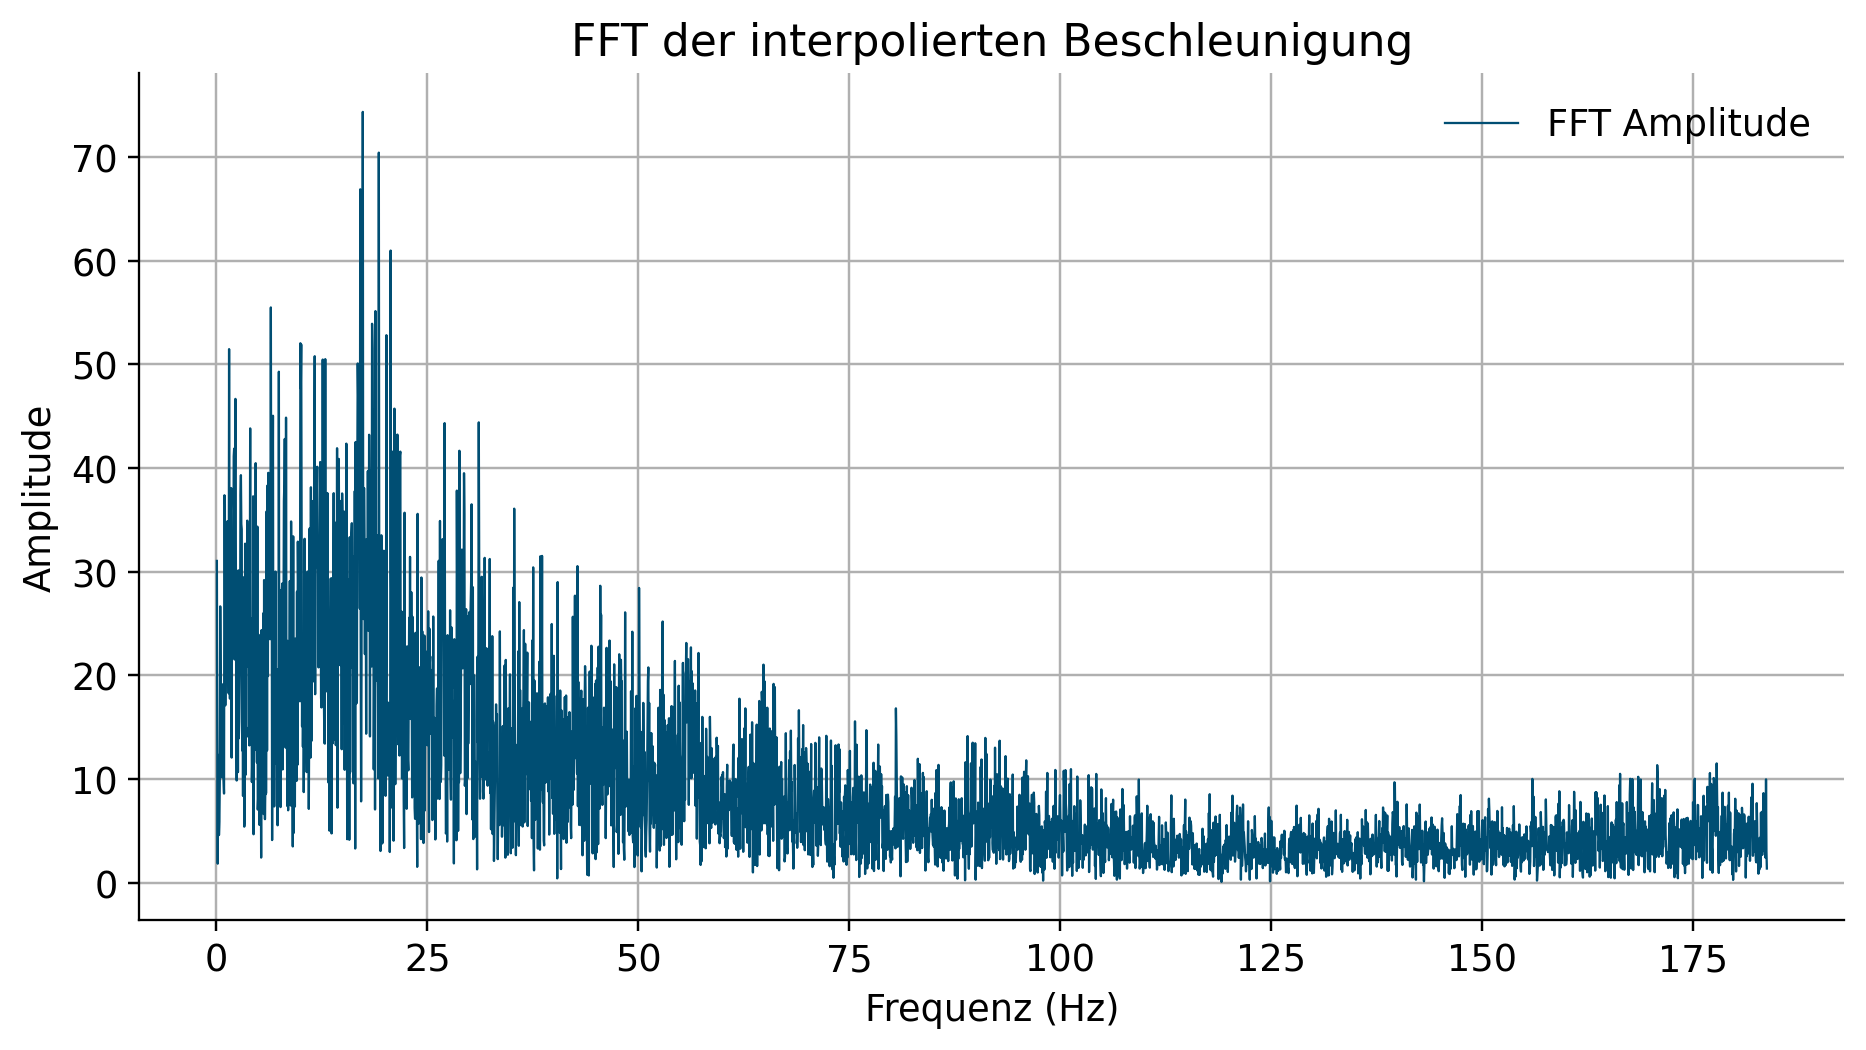

In [51]:
# Verwendung der FFT-Funktion für den interpolierten Betrag der Beschleunigung
fft_amplitude, fft_frequency = my_fft(vec_acc_magnitude, inter_time_x)

# Plot für die Amplitude des Signals als Funktion der Frequenz
plt.figure(figsize=(10, 5))
plt.plot(fft_frequency, fft_amplitude, label='FFT Amplitude')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT der interpolierten Beschleunigung')
plt.legend()
plt.grid(True)
plt.show()

## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

Die Analyse der durchgeführten Experimente liefert klare Einsichten in die beiden aufgestellten Forschungsfragen. Hinsichtlich der Manifestation minimaler Bewegungen in den Beschleunigungsdaten von Gegenständen wie Smartwatches mit Vibrationsalarm oder Lautsprechern zeigen die Ergebnisse, dass solche subtilen Bewegungen deutlich in den Daten erkennbar sind. Die charakteristischen Muster, die durch diese minimalen Bewegungen entstehen, tragen zur Empfindlichkeit der eingesetzten Beschleunigungssensoren bei.

Ein zentraler Aspekt, der während der Diskussion herausgestellt wurde, betrifft die erheblichen Auswirkungen der Positionierung des Beschleunigungssensors auf die gemessenen Daten. Die Variationen in den Signalen, die durch unterschiedliche Sensorpositionen entstehen, unterstreichen die Notwendigkeit einer präzisen Sensorplatzierung. Diese Erkenntnis ist von entscheidender Bedeutung, um genaue und repräsentative Ergebnisse bei der Nutzung von Beschleunigungssensoren zu gewährleisten.
Ein guter Besipiel während des Versuches mit dem Lautschprecher ist der leicht Erhöhung der interpolierte Beschleuinigung von z, da nach der gemessenen Zeit das Tesa sich von alleine weggeklebt hat und dies kann man auf den Graphen schön sehen, dass es auch schon während der Messungszeit angefangen hat.

Natürlich gibt es auch Einschränkungen, die bei der Interpretation der Ergebnisse berücksichtigt werden müssen. Experimentelle Bedingungen, wie Umgebungsvariablen und spezifische Geräteeigenschaften, könnten die Ergebnisse beeinflusst haben. Die Notwendigkeit der Interpolation der Daten für die FFT-Analyse könnte Unsicherheiten oder Artefakte in den Ergebnissen verursacht haben, und diese sollten bei der Bewertung der Datenqualität berücksichtigt werden.


## Fazit
Ziehen Sie ein Fazit zum durchgeführten Versuch, gehen Sie dabei gerne auf Ihrer persönliche Meinung oder Ihre Lernziele ein.

Im Rahmen des durchgeführten Versuchs konnte ich wertvolle Erkenntnisse über die Manifestation minimaler Bewegungen in den Beschleunigungsdaten von Gegenständen gewinnen, insbesondere von Geräten wie Smartwatches mit Vibrationsalarm oder Lautsprechern.

Fazit:
Die Versuche haben gezeigt, dass selbst geringfügige Bewegungen in den Beschleunigungsdaten deutlich nachvollziehbar sind und interessante Muster erzeugen können. Die Wahl der Sensorposition beeinflusst die Daten erheblich, und diese Erkenntnis ist entscheidend für die korrekte Interpretation und Anwendung von Beschleunigungssensoren.

Persönliche Meinung:
Die Arbeit an diesem Experiment war lehrreich und hat mir eine tiefergehende Auseinandersetzung mit den Herausforderungen und Nuancen der Beschleunigungsmessung ermöglicht. Insbesondere die Bedeutung der korrekten und stabilen Sensorplatzierung wurde mir bewusst, und die Notwendigkeit der Interpolation

Lernziele:
Während die Versuche konnte ich nicht nur praktische Erfahrungen mit der Datenerfassung und -verarbeitung sammeln, sondern auch ein besseres Verständnis für die Auswirkungen von experimentellen Entscheidungen auf die Ergebnisse gewinnen. Die Anwendung von FFT zur Frequenzanalyse war ebenfalls eine wertvolle Erweiterung meiner Fähigkeiten im Bereich der Signalverarbeitung.